In [261]:
import pandas as pd

In [262]:
data = pd.read_csv('new_data.csv', index_col='id')

In [3]:
cs_data = pd.DataFrame(data[data['730'] > 60]['730'])

In [4]:
cs_data.columns = ['time']

In [5]:
cs_data.reset_index(inplace=True)

In [6]:
import requests
def get_user_csgo_data(userid):
    url = "http://peace-data-team.ru:4001/user/stats/csgo"

    payload={}
    headers = {
      'steam_id': str(userid)
    }

    response = requests.request("GET", url, headers=headers, data=payload)

    return response.text

In [7]:
cs_data['response'] = cs_data['id'].apply(get_user_csgo_data)

In [8]:
import json
import numpy as np

for j in json.loads(cs_data['response'][1])['playerstats']['stats']:
    cs_data[j['name']] = np.nan

In [9]:
for i in range(len(cs_data)):
    try:
        for j in json.loads(cs_data['response'][i])['playerstats']['stats']:
            cs_data[j['name']][i] = j['value']
    except Exception:
        continue

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [10]:
cs_data.to_csv('cs.csv')

In [20]:
cs_data = cs_data.drop('response',axis=1)

In [25]:
cs_data

,Unnamed: 0,id,time,total_kills,total_deaths,total_time_played,total_planted_bombs
1,1,76561197961630274,156.0,224.0,123.0,6489.0,2.0
3,3,76561197972206066,3768.0,2951.0,3248.0,145626.0,82.0
4,4,76561197973831379,71.0,20.0,30.0,2847.0,2.0
5,5,76561197974743606,1376.0,432.0,778.0,26388.0,5.0
6,6,76561197976420100,1501.0,284.0,425.0,28228.0,8.0
...,...,...,...,...,...,...,...
204,204,76561198149388766,45419.0,35890.0,30004.0,1704179.0,1153.0
205,205,76561198150060942,22615.0,10112.0,7256.0,605447.0,469.0
206,206,76561198150195309,52158.0,18104.0,17741.0,1616796.0,643.0
207,207,76561198151019827,1708.0,576.0,665.0,60990.0,37.0


In [24]:
for col in cs_data.columns:
    if len(cs_data[cs_data[col].isnull()]) > 100:
        cs_data = cs_data.drop(col, axis=1)


In [22]:
cs_data = cs_data[~cs_data['total_time_played'].isnull()]

In [295]:
cs_data = pd.read_csv('cs.csv', index_col=0)

In [296]:
cs_data=cs_data.drop('time',axis=1)

KeyError: "['time'] not found in axis"

In [297]:
cs_data = cs_data.drop('Unnamed: 0', axis=1)

KeyError: "['Unnamed: 0'] not found in axis"

In [33]:
cs_data = cs_data.set_index('id', drop=True)

In [42]:
cs_data.to_csv('cs.csv')

In [312]:
cs_data = pd.read_csv('cs.csv', index_col=0)

In [313]:
cs_data

,total_kills,total_deaths,total_time_played,total_planted_bombs
id,,,,
76561197961630274,224.0,123.0,6489.0,2.0
76561197972206066,2951.0,3248.0,145626.0,82.0
76561197973831379,20.0,30.0,2847.0,2.0
76561197974743606,432.0,778.0,26388.0,5.0
76561197976420100,284.0,425.0,28228.0,8.0
...,...,...,...,...
76561198149388766,35890.0,30004.0,1704179.0,1153.0
76561198150060942,10112.0,7256.0,605447.0,469.0
76561198150195309,18104.0,17741.0,1616796.0,643.0


In [317]:
for col in cs_data.columns:
    print(col, len(cs_data[cs_data[col].isnull()]))

total_kills 0
total_deaths 0
total_time_played 0
total_planted_bombs 0
KD 0


In [315]:
cs_data['KD'] = cs_data['total_kills']/cs_data['total_deaths']

In [316]:
for col in cs_data.columns:
    cs_data[cs_data[col].isnull()] = 0

In [318]:
cs_data

,total_kills,total_deaths,total_time_played,total_planted_bombs,KD
id,,,,,
76561197961630274,224.0,123.0,6489.0,2.0,1.821138
76561197972206066,2951.0,3248.0,145626.0,82.0,0.908559
76561197973831379,20.0,30.0,2847.0,2.0,0.666667
76561197974743606,432.0,778.0,26388.0,5.0,0.555270
76561197976420100,284.0,425.0,28228.0,8.0,0.668235
...,...,...,...,...,...
76561198149388766,35890.0,30004.0,1704179.0,1153.0,1.196174
76561198150060942,10112.0,7256.0,605447.0,469.0,1.393605
76561198150195309,18104.0,17741.0,1616796.0,643.0,1.020461


In [319]:
from sklearn.cluster import KMeans, DBSCAN, FeatureAgglomeration, Birch, MiniBatchKMeans
from sklearn.preprocessing import StandardScaler

In [320]:
cs_data

,total_kills,total_deaths,total_time_played,total_planted_bombs,KD
id,,,,,
76561197961630274,224.0,123.0,6489.0,2.0,1.821138
76561197972206066,2951.0,3248.0,145626.0,82.0,0.908559
76561197973831379,20.0,30.0,2847.0,2.0,0.666667
76561197974743606,432.0,778.0,26388.0,5.0,0.555270
76561197976420100,284.0,425.0,28228.0,8.0,0.668235
...,...,...,...,...,...
76561198149388766,35890.0,30004.0,1704179.0,1153.0,1.196174
76561198150060942,10112.0,7256.0,605447.0,469.0,1.393605
76561198150195309,18104.0,17741.0,1616796.0,643.0,1.020461


In [321]:
from sklearn.manifold import TSNE

data_embedded = TSNE(n_components=2).fit_transform(cs_data[['total_kills', 'total_deaths', 'total_time_played','total_planted_bombs', 'KD']])

<AxesSubplot:xlabel='x', ylabel='y'>

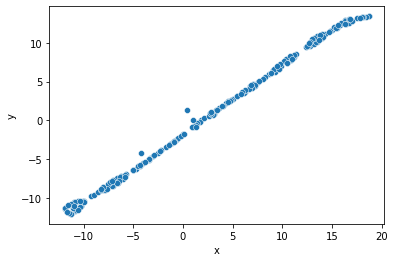

In [322]:
import seaborn as sns
tmp = pd.DataFrame(data_embedded, columns=['x', 'y'])
sns.scatterplot(data=tmp, x='x', y='y')

In [323]:
cl_model = MiniBatchKMeans(3)

In [324]:
cl_model.fit(cs_data)

MiniBatchKMeans(n_clusters=3)

In [325]:
cl_model.labels_

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 2, 0, 1, 0,
       0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [326]:
cs_data['cluster'] = cl_model.labels_

<AxesSubplot:xlabel='x', ylabel='y'>

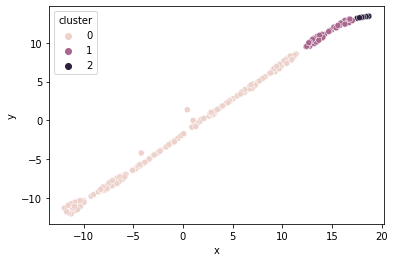

In [327]:
import seaborn as sns
tmp = pd.DataFrame(data_embedded, columns=['x', 'y'])
sns.scatterplot(data=tmp, x='x', y='y', hue=cs_data.reset_index()['cluster'])

In [328]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors=20)

In [329]:
knn.fit(cs_data)

NearestNeighbors(n_neighbors=20)

In [330]:
cs_data

,total_kills,total_deaths,total_time_played,total_planted_bombs,KD,cluster
id,,,,,,
76561197961630274,224.0,123.0,6489.0,2.0,1.821138,0
76561197972206066,2951.0,3248.0,145626.0,82.0,0.908559,0
76561197973831379,20.0,30.0,2847.0,2.0,0.666667,0
76561197974743606,432.0,778.0,26388.0,5.0,0.555270,0
76561197976420100,284.0,425.0,28228.0,8.0,0.668235,0
...,...,...,...,...,...,...
76561198149388766,35890.0,30004.0,1704179.0,1153.0,1.196174,0
76561198150060942,10112.0,7256.0,605447.0,469.0,1.393605,0
76561198150195309,18104.0,17741.0,1616796.0,643.0,1.020461,0


In [335]:
cols = ['total_kills', 'total_deaths', 'total_time_played','total_planted_bombs', 'KD']

def get_cs_team(user_id):
    user_data = pd.DataFrame({'0': 0}, index=[0])
    res = json.loads(get_user_csgo_data(user_id))
    for j in res['playerstats']['stats']:
        user_data[j['name']] = j['value']
    user_data['KD'] = user_data['total_kills']/user_data['total_deaths']
    try:
        user_data = user_data[cols]
    except Exception:
        missed = list(set(cols) - set(user_data.columns))
        user_data[missed] = 0
        user_data = user_data[cols]
        for col in user_data.columns:
            user_data[user_data[col].isnull()] = 0
        user_data['cluster'] = cl_model.predict(user_data)[0]
        res = knn.kneighbors(user_data)[1][0][1:]
    return json.dumbs(json.loads(pd.DataFrame(cs_data.iloc[res].index).to_json())['id'])

In [336]:
get_cs_team(76561197972876528)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

,id
0,76561198134492447
1,76561198131213406
2,76561198028985624
3,76561198018063963
4,76561198130440185
5,76561198039421493
6,76561197976497501
7,76561198152371698
8,76561197973831379
9,76561198134981754


In [338]:
import pickle
pickle.dump(cl_model, open('cl_model.sav', 'wb'))
pickle.dump(knn, open('knn.sav', 'wb'))

In [339]:
cs_data.to_csv('cs.csv')